In [4]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import color

In [29]:
img = io.imread("house.jpg")
gray_img = color.rgb2gray(img)

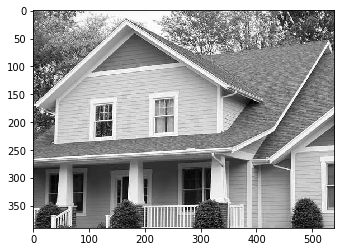

In [30]:
plt.imshow(gray_img, cmap = plt.get_cmap('gray'))
plt.show()

In [31]:
dx = np.array([[-1,0,1],
               [-1,0,1],
               [-1,0,1]])
dy = np.array([[-1,-1,-1],
               [0,0,0],
               [1,1,1]])

In [32]:
ix = ndimage.convolve(gray_img,dx)
iy = ndimage.convolve(gray_img,dy)

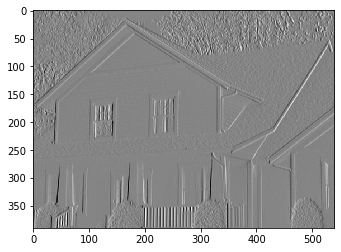

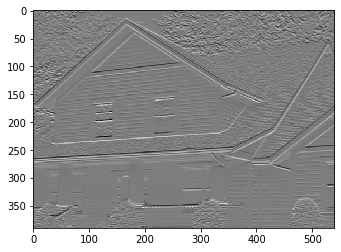

In [33]:
plt.imshow(ix,cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(iy,cmap = plt.get_cmap('gray'))
plt.show()

In [34]:
ix2 = ix**2
ixy = ix*iy
iy2 = iy**2

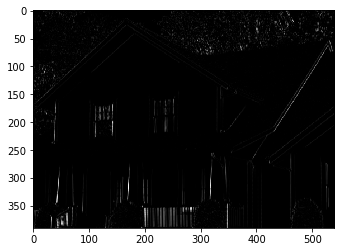

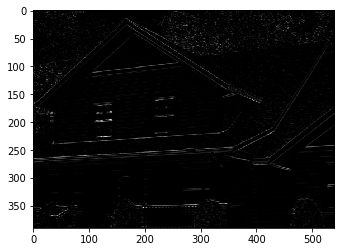

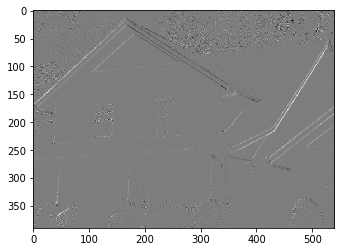

In [35]:
plt.imshow(ix2,cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(iy2,cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(ixy,cmap = plt.get_cmap('gray'))
plt.show()

In [36]:
from scipy import signal

def gkern(kernlen=21, std=3):
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

In [37]:
ix2 = ndimage.convolve(ix2, gkern(3,1))
iy2 = ndimage.convolve(iy2, gkern(3,1))
ixy = ndimage.convolve(ixy, gkern(3,1))

In [105]:
k = 0.05 # it is empirical to be between 0.04 - 0.06
edgeThreshold = -70
cornerThreshold = 90
corners = np.zeros(ix2.shape)
edges = np.zeros(ix2.shape)
response_mat = np.zeros(ix2.shape)
for x in range(1, ix2.shape[0]): #ix2, ixy, iy2 all have the same shape
    for y in range(1, ix2.shape[1]):
        sx2 = np.sum(ix2[x-1:x+2,y-1:y+2])
        sy2 = np.sum(iy2[x-1:x+2,y-1:y+2])
        sxy = np.sum(ixy[x-1:x+2,y-1:y+2])
        
        det = (sx2*sy2)-sxy**2
        trace = sx2+sy2
        response = det - (k*(trace**2))
        response_mat[x,y] = response
        if response>cornerThreshold:
            corners[x,y] = response
        elif response<edgeThreshold:
            edges[x,y] = 1
        

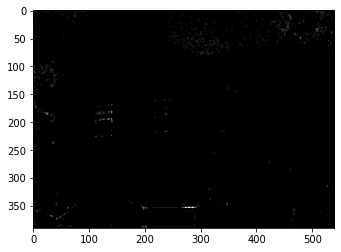

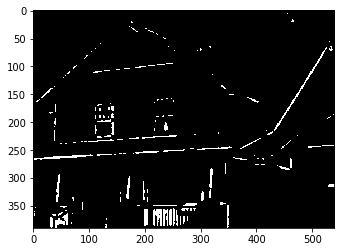

In [106]:
plt.imshow(corners, cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(edges, cmap = plt.get_cmap('gray'))
plt.show()

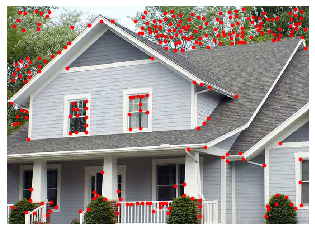

In [112]:
from skimage.feature import peak_local_max
coordinates = peak_local_max(corners, min_distance=5)
plt.axis('off')
plt.imshow(img)
plt.scatter(coordinates[:, 1], coordinates[:, 0], c='r', s=7)
plt.show()